In [93]:
import pandas as pd
import numpy as np

data= pd.read_csv('C:/Users/Lenovo/Desktop/IPY/MoviesDataSet/movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [94]:
#As we can see that there are few columns that are missing from the 'view'.
#To discover all-
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [95]:
#Re-Checking NULL values and sorting them !
Isnull=data.isnull().sum()
Isnull.sort_values(inplace=True, ascending=False)
print(Isnull)

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
status                      87
release_date                87
imdb_id                     17
original_language           11
vote_average                 6
vote_count                   6
revenue                      6
spoken_languages             6
title                        6
video                        6
popularity                   5
production_companies         3
production_countries         3
original_title               0
id                           0
genres                       0
budget                       0
adult                        0
dtype: int64


In [96]:
#runtime                    263
#release_date                87
#vote_average                 6
#vote_count                   6
#Let's see revenue            6
#popularity                   5
#IMDB CALCULATION

In [97]:
data = data[data['adult'] == 'False']

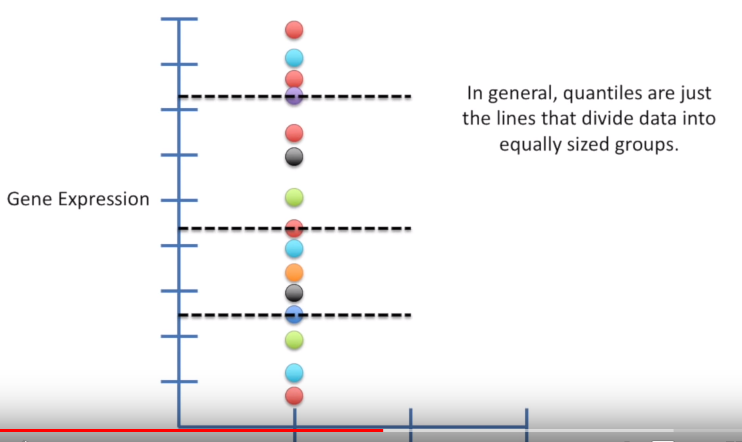

In [98]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['year'] = data['release_date'].dt.year

In [99]:
data['year'].fillna(0, inplace=True)

In [100]:
data['year'] = data['year'].astype('int')

In [101]:
#data['year']

In [102]:
print(min(data['year']))
print(max(data['year']))
print(data['year'].mean())

0
2020
1988.111101333216


In [103]:
data = data[data['year'] > 2000]

In [104]:
#Calculate the number of votes garnered by the 80th percentile movie
m = data['vote_count'].quantile(0.90)
print(m)

269.0


In [105]:
data = data[data['vote_count'] >= m]

In [106]:
data = data[data['runtime'] > (data['runtime'].median())]   

In [107]:
data.shape

(1161, 25)

In [108]:
data = data[data['vote_average'] > (data['vote_average'].quantile(0.80))]         

In [109]:
list_movies = data.sort_values(['vote_average'], ascending=[False]) 

In [110]:
list_movies['title']

40251                                           Your Name.
12481                                      The Dark Knight
5481                                         Spirited Away
25465                                                Mommy
18465                                     The Intouchables
5878                                           City of God
43190                                     Band of Brothers
9698                                  Howl's Moving Castle
22879                                         Interstellar
5857                                           The Pianist
32144                                                 Room
42015                                  The Invisible Guest
7000         The Lord of the Rings: The Return of the King
16881                                                Senna
38718                                       The Handmaiden
15480                                            Inception
9430                                                Oldb